# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: Clustering and dimension-reduction
### VIDEO: K-means clustering
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [41]:
# experimenting with transpose and concatenate

A = [  1, 1 ] # x, y coords
B = [ -3, 1 ]
C = [  3, 3 ]
print(A)

a = [A[0]+np.ones(2)*3,A[1]+np.ones(2)*3]
b = [B[0]+np.ones(2)*5,B[1]+np.ones(2)*5]
print('[...xcoords, ...ycoords]')
print(f'{a=}')
print(f'{b=}')

print('\n vstack - no good, coords are interleaved:')
print(np.vstack((a,b)))

# keeps same shape [[x][y]] and combines/appends element wise from the different datasets (xs appended to xs in one row and y's appended to y's in the other)
print('\n concating and transposing:')
d = np.concatenate((a,b),axis=1)
print('concated only on axis=1:')
print(d)
print('transposed:')
dt = np.transpose(d)
print(dt)

print('\n concated x and y slices:')
print(d[0],d[1])
print('transposed x and y slices: ')
print(dt[:,0],dt[:,1])


[1, 1]
[...xcoords, ...ycoords]
a=[array([4., 4.]), array([4., 4.])]
b=[array([2., 2.]), array([6., 6.])]

 vstack - no good, coords are interleaved:
[[4. 4.]
 [4. 4.]
 [2. 2.]
 [6. 6.]]

 concating and transposing:
concated only on axis=1:
[[4. 4. 2. 2.]
 [4. 4. 6. 6.]]
transposed:
[[4. 4.]
 [4. 4.]
 [2. 6.]
 [2. 6.]]

 concated x and y slices:
[4. 4. 2. 2.] [4. 4. 6. 6.]
transposed x and y slices: 
[4. 4. 2. 2.] [4. 4. 6. 6.]


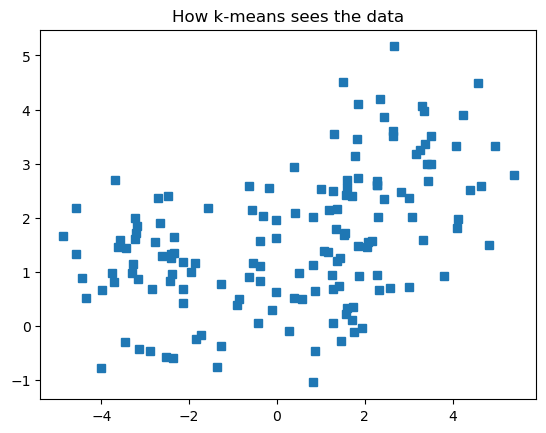

In [62]:
## Create data

nPerClust = 50 # 50 data points in each cluster (3 clusters)

# blur around centroid (std units)
blur = 1

# XY centroid locations - 3 clusters
A = [  1, 1 ] # x, y coords
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
# Generate 50 gaussian distributed numbers, stretch them out with a blur factor, add on the X or Y centroid
# this creates nPerClust X points (in one array) and nPerClust Y points (in second arr) - each point is added to a random number - [[X1,X2,X3,X4,...],[Y1,Y2,Y3,Y4,...]]
# Since we are adding a numpy array and not just a number, it runs the operation result and generates that many elements
# the blur is a factor multiplication is applied first to the numpy array (multiplication is done before addition in std order of ops), then A[0] etc. is added to that result
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a list - vector of 150 (50*3) rows and two columns (the x and y)
# We do this to allow for easy selection of all xcoords (in one column) and all ycoords (in another column) for plotting
# Concatenate element wise ([ [ ...A[xcoords],...B[xcoords],...C[xcoords] ], [ ...A[ycoords],...B[ycoords],...C[ycoords] ] ] ) - xcoords from datasets on one row, ycoords for datasets on another row
data = np.transpose(np.concatenate((a,b,c),axis=1))
# data = np.concatenate((a,b,c),axis=1)

# show the data
# first arg is x's and second arg is y's
plt.plot(data[:,0],data[:,1],'s') # [:,0] is all rows and the first column, [:1] is all rows and the second column
# plt.plot(data[0],data[1],'s') # This can be done to get same result if you don't transpose and just use the concatenated data (the first row is xcoords and second row is ycoords)
plt.title('How k-means sees the data') 
plt.show()

c:\anaconda\envs\pytorch2023\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\anaconda\envs\pytorch2023\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


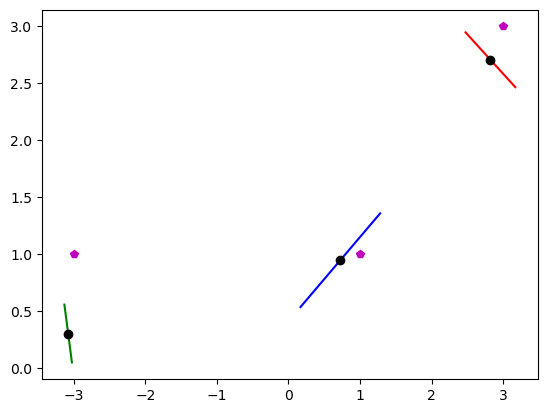

In [44]:
## k-means clustering

k = 3 # how many clusters?
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(data)
# group labels
groupidx = kmeans.predict(data)
# centroids
cents = kmeans.cluster_centers_

# draw lines from each data point to the centroids of each cluster
lineColors = 'rgbgmrkbgm';
for i in range(0,len(data)):
    plt.plot([ data[i,0],cents[groupidx[i],0] ],[ data[i,1],cents[groupidx[i],1] ],lineColors[groupidx[i]])

# and now plot the centroid locations
plt.plot(cents[:,0],cents[:,1],'ko')

# finally, the "ground-truth" centers
plt.plot(A[0],A[1],'mp')
plt.plot(B[0],B[1],'mp')
plt.plot(C[0],C[1],'mp')

plt.show()

In [ ]:
## determining the appropriate number of clusters (qualitative)

fig,ax = plt.subplots(2,3,figsize=(7,5))
ax = ax.flatten()

for k in range(6):
    
    kmeans = KMeans(n_clusters=k+1).fit(data)
    groupidx = kmeans.predict(data)
    cents = kmeans.cluster_centers_
    
    # draw lines from each data point to the centroids of each cluster
    for i in range(0,len(data)):
        ax[k].plot([ data[i,0],cents[groupidx[i],0] ],[ data[i,1],cents[groupidx[i],1] ],lineColors[groupidx[i]])
    
    # and now plot the centroid locations
    ax[k].plot(cents[:,0],cents[:,1],'ko')
    ax[k].set_xticks([])
    ax[k].set_yticks([])
    ax[k].set_title('%g clusters'%(k+1))

In [ ]:
## number of clusters (quantative)

from sklearn.metrics import silhouette_samples, silhouette_score

ssds = np.zeros(7)
sils = np.zeros(7)/0

for k in range(7):
    kmeans = KMeans(n_clusters=k+1).fit(data)
    ssds[k] = np.mean(kmeans.inertia_)
    
    if k>0:
        s = silhouette_samples(data,kmeans.predict(data))
        sils[k] = np.mean( s )

plt.plot(np.arange(1,8),ssds,'k^-',markerfacecolor='k')
plt.title('The elbow test')
plt.show()

plt.plot(np.arange(1,8),sils,'k^-',markerfacecolor='k')
plt.title('The silhouette test')
plt.xlabel('Number of clusters')
plt.show()

In [ ]:
## Try again in 3D

nPerClust = 50

# blur around centroid (std units)
n = 1

# XY centroid locations
A = [  1, 2,  0 ]
B = [ -2, 1, -2 ]
C = [  3, 3,  2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*n , A[1]+np.random.randn(nPerClust)*n , A[2]+np.random.randn(nPerClust)*n ]
b = [ B[0]+np.random.randn(nPerClust)*n , B[1]+np.random.randn(nPerClust)*n , B[2]+np.random.randn(nPerClust)*n ]
c = [ C[0]+np.random.randn(nPerClust)*n , C[1]+np.random.randn(nPerClust)*n , C[2]+np.random.randn(nPerClust)*n ]

# concatanate into a list
data = np.transpose( np.concatenate((a,b,c),axis=1) )

# may need this with update - can remove axes3d
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# show the data
ax = Axes3D(plt.figure())
ax.scatter(data[:,0],data[:,1],data[:,2], c = 'b', marker='o')
plt.title('How k-means sees the data')
plt.show()

In [ ]:

k = 3 # how many clusters?
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(data)
# group labels
groupidx = kmeans.predict(data)
# centroids
cents = kmeans.cluster_centers_

# draw lines from each data point to the centroids of each cluster
lineColors = 'rgbgmrkbgm';
ax = Axes3D(plt.figure())
for i in range(0,len(data)):
    ax.plot([ data[i,0],cents[groupidx[i],0] ],[ data[i,1],cents[groupidx[i],1] ],[ data[i,2],cents[groupidx[i],2] ],lineColors[groupidx[i]])

# and now plot the centroid locations
ax.plot(cents[:,0],cents[:,1],cents[:,2],'ko')

plt.show()